In [1]:
#include <lodepng_config_cling.h>
#include <vtkm_config_cling.h>
#include <iostream>
#include <string>
#include <VTKmXeusRender.h>
#include <adios2.h>

#pragma cling load("adios2")

In [2]:
#include <vtkm/cont/testing/MakeTestDataSet.h>
std::unique_ptr<VTKmXeusRender> renderer;


In [3]:

bool running = true;

In [4]:
void display(std::string fn, std::string vn, int nx, int ny)
{
    std::stringstream filename;
    filename << "/home/ybk/Projects/raytracingtherestofyourlife/build/debug/";
    filename << fn;
    /** ADIOS class factory of IO class objects, DebugON is recommended */
    adios2::ADIOS adios(adios2::DebugON);

    /*** IO class object: settings and factory of Settings: Variables,
     * Parameters, Transports, and Execution: Engines */
    adios2::IO bpIO = adios.DeclareIO("ReadBP");

    /** Engine derived class, spawned to start IO operations */
    adios2::Engine bpReader = bpIO.Open(filename.str(), adios2::Mode::Read);

    /** Write variable for buffering */
    adios2::Variable<float> bpFloats =
    bpIO.InquireVariable<float>(vn);


    if (bpFloats)
    {
        
        std::vector<float> depthBuffer;
        std::vector<vtkm::Vec<vtkm::Float32,4>> useful;
        useful.resize(nx*ny);
        bpReader.Get<float>(bpFloats, depthBuffer, adios2::Mode::Sync);
        std::cout << "Float vector inside " << filename.str() << ": {" << depthBuffer.size() << " ";
        std::cout << useful.size() << "}";
  
         for (int i=0; i<useful.size(); i++)
        {
            //std::cout << x << ", ";
            auto &uf = useful[i];
            uf[0] = depthBuffer[i*4];
            uf[1] = depthBuffer[i*4+1];
            uf[2] = depthBuffer[i*4+2];
            uf[3] = 0;
            
        }
        std::cout << "}\n";
        vtkm::cont::ArrayHandle arr = vtkm::cont::make_ArrayHandle(useful);
        renderer = std::make_unique<VTKmXeusRender>();
        renderer->Display(arr, nx,ny);
    }
}

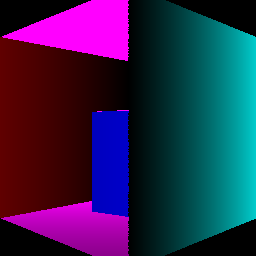

Float vector inside /home/ybk/Projects/raytracingtherestofyourlife/build/debug/albedo: {262144 65536}}


In [5]:
[](){auto try_and_err = []() {
    
    renderer = std::make_unique<VTKmXeusRender>();
    display("albedo", "0.785398-0", 256, 256);
    
};try_and_err();}();